In [1]:
import pandas as pd
import numpy as np

# S3 경로
train_path = 's3://smwu-project-datasets/traing-dataset/rtu_data_full.csv'
val_path = 's3://smwu-project-datasets/may-dataset/rtu_ground_truth_may.csv'

In [2]:
train_df = pd.read_csv(train_path, usecols=['localtime', 'activePower','voltageR','timestamp','module(equipment)','accumActiveEnergy'])

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:286: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


In [3]:
train_df.head()

,module(equipment),timestamp,localtime,voltageR,activePower,accumActiveEnergy
0,1(PM-3),1733040000000,20241201000000,214.38,2961.61,1955004
1,1(PM-3),1733040005000,20241201000005,214.05,3017.48,1955008
2,1(PM-3),1733040010000,20241201000010,215.79,2408.01,1955011
3,1(PM-3),1733040015000,20241201000015,210.39,3289.33,1955016
4,1(PM-3),1733040020000,20241201000020,216.71,3069.31,1955020


In [4]:
# localtime을 datetime으로 변환
train_df['localtime'] = pd.to_datetime(train_df['localtime'], format="%Y%m%d%H%M%S")

# 시간 단위로 R상 전압 평균 구하기
hourly_voltage = train_df.resample('1H', on='localtime')['voltageR'].mean().dropna()

In [5]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 82.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np

# 시계열을 DataFrame으로 변환
df = pd.DataFrame({
    'actual': hourly_voltage
})

# 예측값 추가
df['forecast'] = forecast

# 잔차 및 이상치 여부 추가
df['residual'] = df['actual'] - df['forecast']
threshold = 3 * np.std(df['residual'])

df['is_anomaly'] = df['residual'].abs() > threshold

In [14]:
df.head()

,actual,forecast,residual,is_anomaly
localtime,,,,
2024-12-01 00:00:00,214.900361,NaN,NaN,False
2024-12-01 01:00:00,214.930713,214.997672,-0.066959,False
2024-12-01 02:00:00,214.998331,214.996312,0.002020,False
2024-12-01 03:00:00,215.022839,214.993282,0.029557,False
2024-12-01 04:00:00,214.989747,214.992184,-0.002437,False


In [15]:
df.to_csv('anomaly_detection.csv')

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('anomaly_detection.csv')

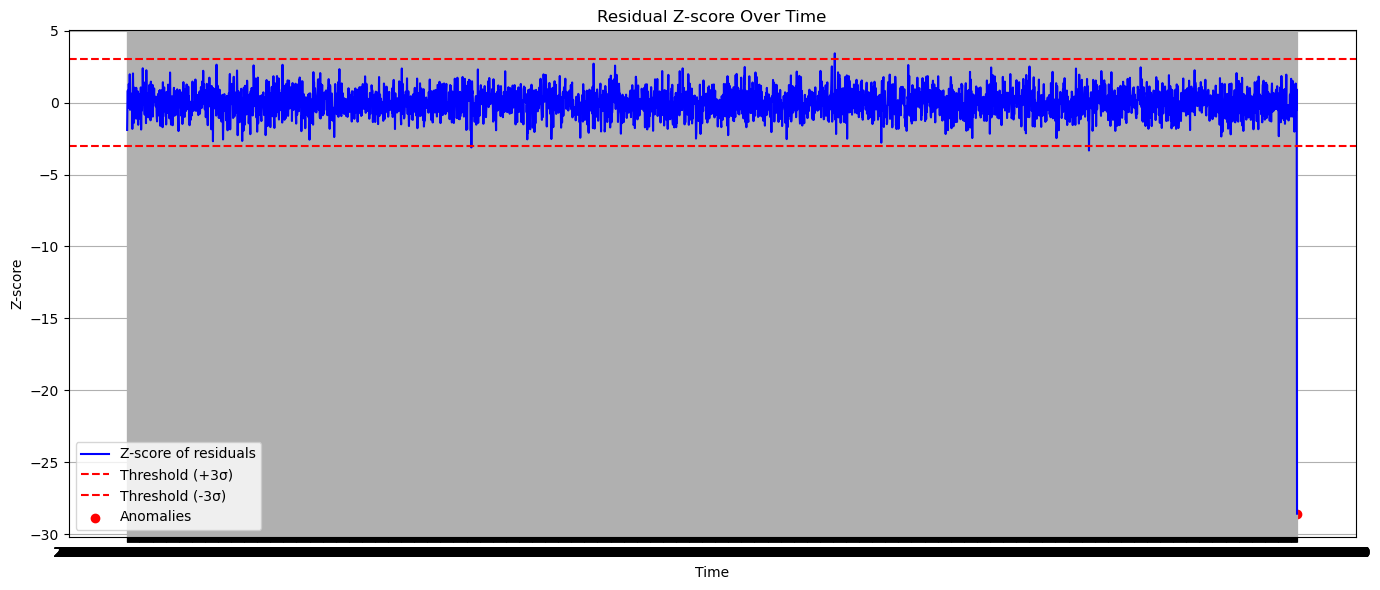

In [3]:
import numpy as np

residual_mean = df['residual'].mean()
residual_std = df['residual'].std()

df['z_score'] = (df['residual'] - residual_mean) / residual_std
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['localtime'], df['z_score'], label='Z-score of residuals', color='blue')
plt.axhline(3, color='red', linestyle='--', label='Threshold (+3σ)')
plt.axhline(-3, color='red', linestyle='--', label='Threshold (-3σ)')

# 이상치 점 찍기
outliers = df[np.abs(df['z_score']) > 3]
plt.scatter(outliers['localtime'], outliers['z_score'], color='red', label='Anomalies')

plt.title('Residual Z-score Over Time')
plt.xlabel('Time')
plt.ylabel('Z-score')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [9]:
# from statsmodels.tsa.arima.model import ARIMA
# from pmdarima import auto_arima

# results = []

# # 모듈별 이상치 탐지
# for module, group in hourly_voltage.groupby('module(equipment)'):
#     ts = group.set_index('localtime')['voltageR']

#     try:
#         # auto_arima로 최적 파라미터 찾기
#         stepwise_model = auto_arima(ts,
#                                      start_p=0, start_q=0,
#                                      max_p=3, max_q=3,
#                                      seasonal=False,
#                                      d=None,
#                                      error_action='ignore',
#                                      suppress_warnings=True,
#                                      stepwise=True)

#         # statsmodels로 학습 및 예측
#         model = ARIMA(ts, order=stepwise_model.order)
#         model_fit = model.fit()
#         forecast = model_fit.predict(start=1, end=len(ts), typ='levels')
#         actual = ts[1:]
#         residual = actual - forecast
#         threshold = 3 * np.std(residual)
#         is_anomaly = residual.abs() > threshold

#         # 원본 group에 이상치 정보 추가
#         group = group.iloc[1:].copy()
#         group['module_forecast'] = forecast.values
#         group['module_residual'] = residual.values
#         group['module_voltageR_anomaly'] = is_anomaly.values
#         results.append(group)

#     except Exception as e:
#         print(f"[{module}] 오류 발생:", e)

# # 결과 통합
# hourly_voltage_with_anomaly = pd.concat(results).reset_index(drop=True)


KeyError: 'module(equipment)'

In [7]:
train_df.head()

,module(equipment),timestamp,localtime,voltageR,activePower,accumActiveEnergy
0,1(PM-3),1733040000000,2024-12-01 00:00:00,214.38,2961.61,1955004
1,1(PM-3),1733040005000,2024-12-01 00:00:05,214.05,3017.48,1955008
2,1(PM-3),1733040010000,2024-12-01 00:00:10,215.79,2408.01,1955011
3,1(PM-3),1733040015000,2024-12-01 00:00:15,210.39,3289.33,1955016
4,1(PM-3),1733040020000,2024-12-01 00:00:20,216.71,3069.31,1955020


In [9]:
s_df = pd.read_csv(train_path, usecols=['localtime', 'activePower','voltageS','timestamp','module(equipment)','accumActiveEnergy'])

In [10]:
# localtime을 datetime으로 변환
s_df['localtime'] = pd.to_datetime(s_df['localtime'], format="%Y%m%d%H%M%S")

# 시간 단위로 R상 전압 평균 구하기
hourly_voltage = s_df.resample('1H', on='localtime')['voltageS'].mean().dropna()

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarni

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=48900.352, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.24 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.40 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-14838.282, Time=0.55 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=2.89 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-14781.779, Time=1.04 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=1.55 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.27 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-14860.504, Time=2.30 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-14839.034, Time=3.74 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-14882.970, Time=2.90 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-14820.510, Time=1.40 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-14916.858, Time=3.75 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,3)(0,0,0)[0]             : AIC=-14906.255, Time=3.33 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,4)(0,0,0)[0]             : AIC=-14799.640, Time=3.33 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=4.56 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-14801.204, Time=3.25 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,4)(0,0,0)[0]             : AIC=-14919.446, Time=10.72 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,4)(0,0,0)[0]             : AIC=-14897.232, Time=6.95 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,5)(0,0,0)[0]             : AIC=inf, Time=6.58 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,5)(0,0,0)[0]             : AIC=-14849.327, Time=3.79 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,3)(0,0,0)[0]             : AIC=-14860.247, Time=3.57 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,5)(0,0,0)[0]             : AIC=-14591.942, Time=5.77 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=-15009.289, Time=3.23 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=-15011.187, Time=3.40 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-15013.904, Time=2.71 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-15015.656, Time=4.30 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-15017.876, Time=1.85 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-15018.585, Time=0.92 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-15016.355, Time=0.96 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-15016.522, Time=2.18 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-15014.507, Time=3.23 sec


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=5.05 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0] intercept
Total fit time: 100.776 seconds
Best ARIMA order: (0, 0, 3)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


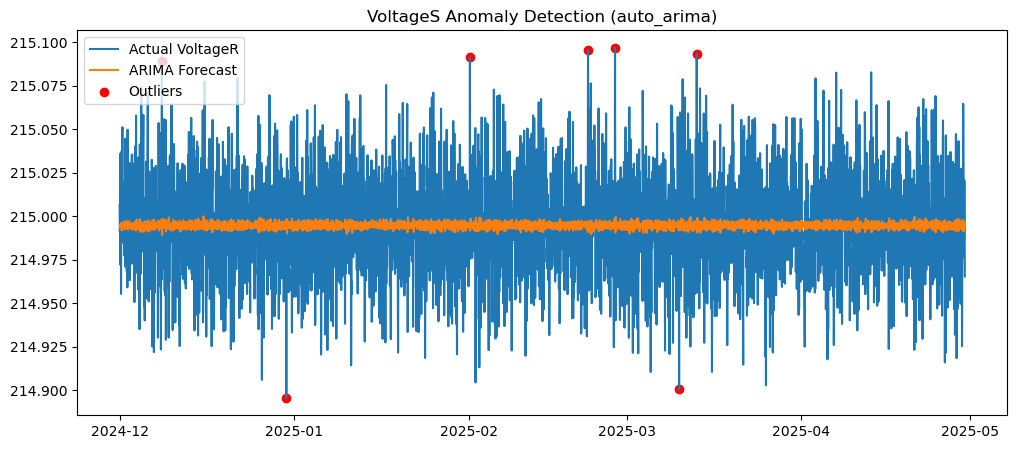

In [12]:
# 2. auto_arima로 최적 파라미터 찾기
stepwise_model = auto_arima(hourly_voltage,
                            start_p=0, start_q=0,
                            max_p=5, max_q=5,
                            seasonal=False,
                            d=None,  # 차분 자동 설정
                            trace=True,  # 학습 로그 출력
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

# 최적 (p,d,q) 확인
print("Best ARIMA order:", stepwise_model.order)

# 3. statsmodels ARIMA 모델로 재학습 (더 유연함)
model = ARIMA(hourly_voltage, order=stepwise_model.order)
model_fit = model.fit()

# 4. 전체 구간 예측
forecast = model_fit.predict(start=1, end=len(hourly_voltage), typ='levels')
actual = hourly_voltage[1:]
residuals = actual - forecast

# 5. 이상치 탐지 (예: 잔차가 표준편차 3배 이상)
threshold = 3 * np.std(residuals)
outliers = residuals[np.abs(residuals) > threshold]

# 6. 시각화
plt.figure(figsize=(12, 5))
plt.plot(hourly_voltage, label='Actual VoltageR')
plt.plot(forecast, label='ARIMA Forecast')
plt.scatter(outliers.index, actual[outliers.index], color='red', label='Outliers')
plt.legend()
plt.title('VoltageS Anomaly Detection (auto_arima)')
plt.show()

In [18]:
train_df2 = pd.read_csv(train_path, usecols=['localtime', 'activePower','voltageR','timestamp','module(equipment)','accumActiveEnergy'])
# localtime을 datetime으로 변환
train_df2['localtime'] = pd.to_datetime(train_df2['localtime'], format="%Y%m%d%H%M%S")

# 전압 시계열 데이터 생성 (localtime를 인덱스로 설정)
voltage_ts = train_df2.set_index('localtime')['voltageR']
# 일 단위 평균
daily_voltage = voltage_ts.resample('D').mean()

# 주 단위 평균
weekly_voltage = voltage_ts.resample('W').mean()

# 월 단위 평균
monthly_voltage = voltage_ts.resample('M').mean()

from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

def detect_arima_outliers_auto(series, threshold=3.0):
    series = series.dropna()
    if len(series) < 20:
        return pd.DataFrame({'value': series, 'is_outlier': [False] * len(series)})

    try:
        # auto_arima로 최적 차수 자동 선택
        stepwise_model = auto_arima(
            series,
            seasonal=False,
            suppress_warnings=True,
            error_action='ignore',
            stepwise=True,
            max_p=3, max_q=3
        )

        # ARIMA 모델 학습
        model = ARIMA(series, order=stepwise_model.order)
        model_fit = model.fit()
        preds = model_fit.predict(start=0, end=len(series)-1)

        # 잔차 계산
        residuals = series - preds
        std_resid = residuals.std()

        is_outlier = residuals.abs() > threshold * std_resid

        return pd.DataFrame({
            'value': series,
            'residual': residuals,
            'is_outlier': is_outlier
        })

    except Exception as e:
        return pd.DataFrame({'value': series, 'is_outlier': [False]*len(series)})



In [19]:
daily_outliers = detect_arima_outliers_auto(daily_voltage)
weekly_outliers = detect_arima_outliers_auto(weekly_voltage)
monthly_outliers = detect_arima_outliers_auto(monthly_voltage)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarni

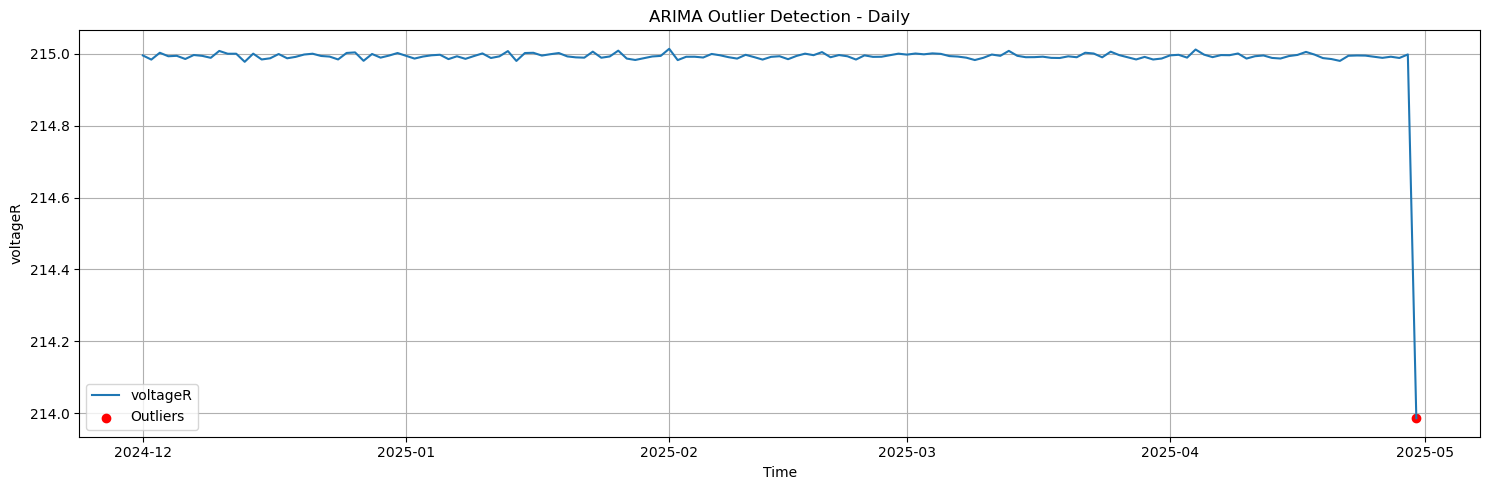

In [20]:
import matplotlib.pyplot as plt

def plot_arima_outliers(df_outlier, title=''):
    plt.figure(figsize=(15, 5))
    plt.plot(df_outlier.index, df_outlier['value'], label='voltageR')
    plt.scatter(df_outlier.index[df_outlier['is_outlier']], df_outlier['value'][df_outlier['is_outlier']],
                color='red', label='Outliers')
    plt.title(f'ARIMA Outlier Detection - {title}')
    plt.xlabel('Time')
    plt.ylabel('voltageR')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 일별 시각화
plot_arima_outliers(daily_outliers, 'Daily')

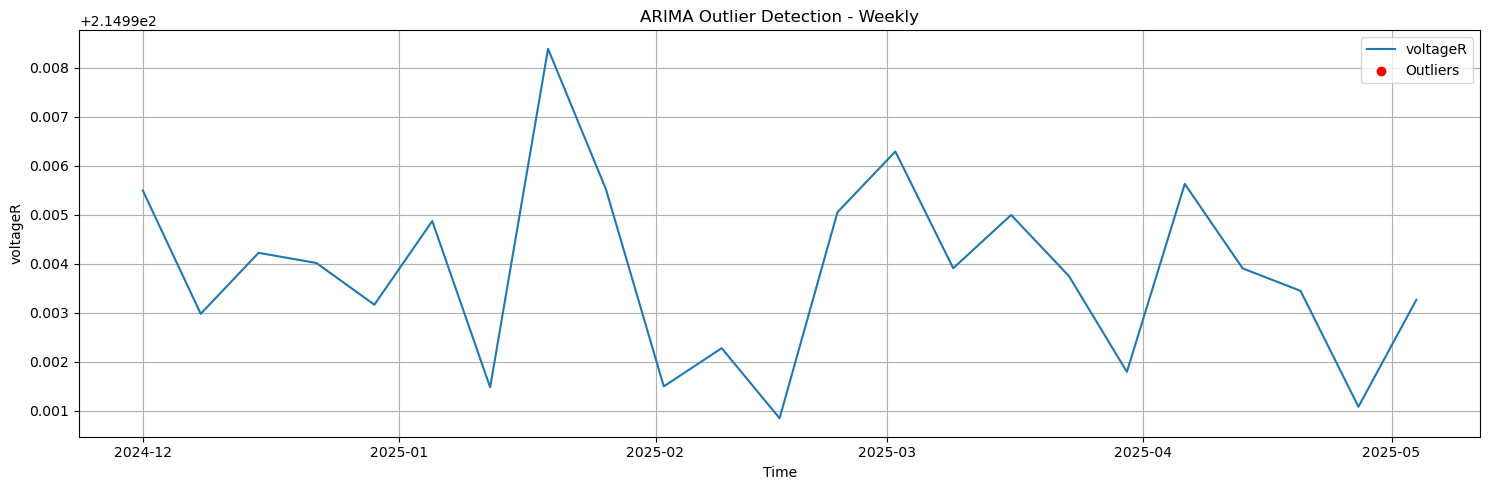

In [21]:
# 주별 시각화
plot_arima_outliers(weekly_outliers, 'Weekly')

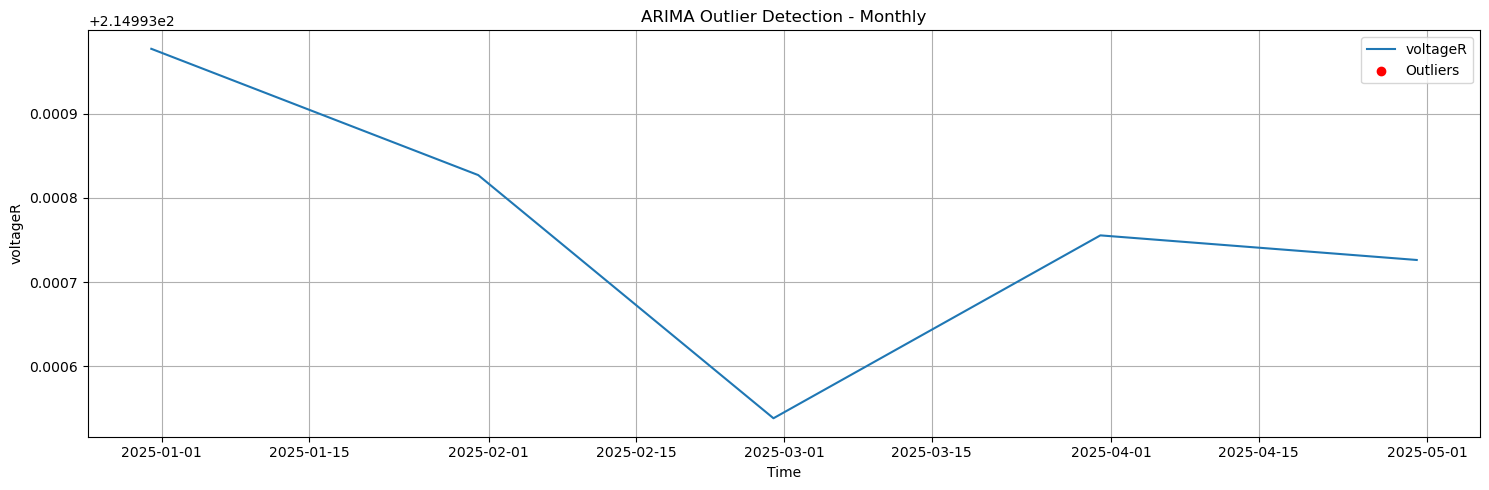

In [22]:
# 월별 시각화
plot_arima_outliers(monthly_outliers, 'Monthly')

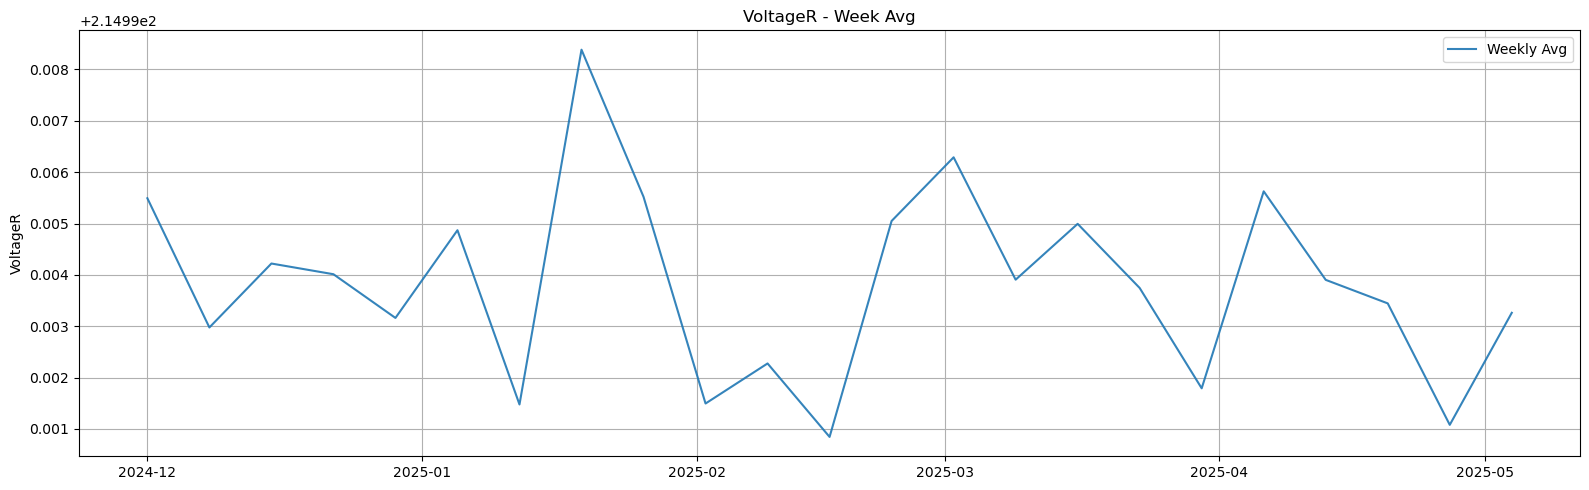

In [16]:
# plt.figure(figsize=(16, 5))
# plt.plot(weekly_voltage, label='Weekly Avg', alpha=0.9)
# plt.title('VoltageR - Week Avg')
# plt.ylabel('VoltageR')
# # plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


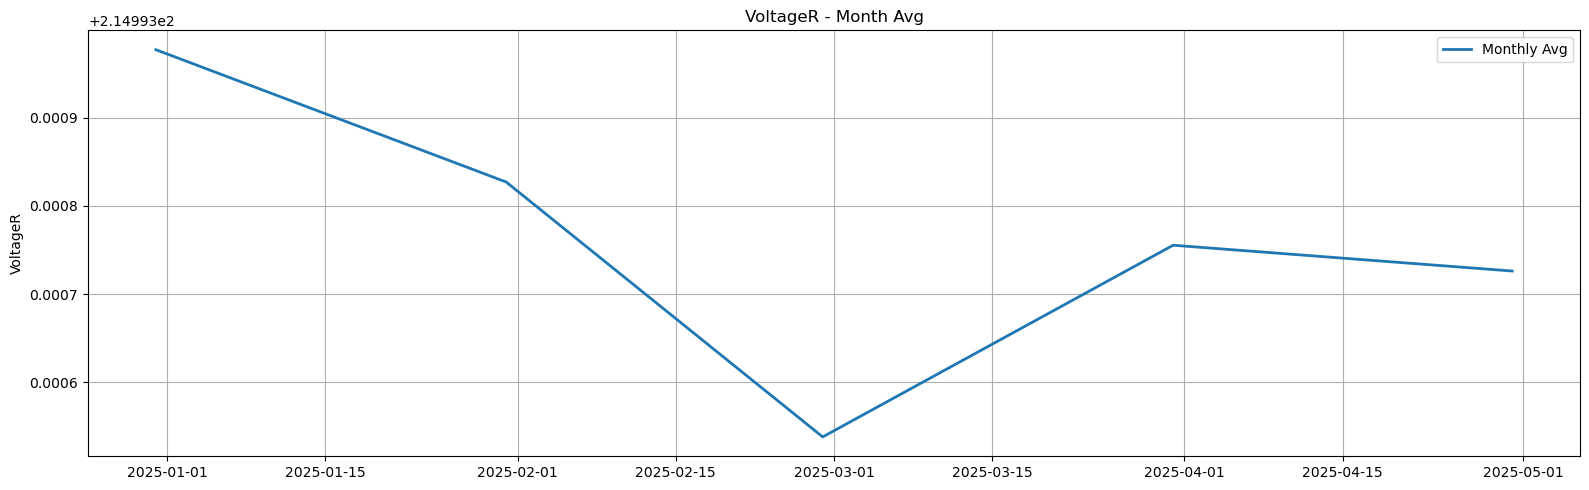

NameError: name 'ᄑ' is not defined

In [17]:
# plt.figure(figsize=(16, 5))
# plt.plot(monthly_voltage, label='Monthly Avg', linewidth=2)
# plt.title('VoltageR - Month Avg')
# plt.ylabel('VoltageR')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [16]:
module_df= pd.read_csv(train_path, usecols=['localtime', 'activePower','voltageR','timestamp','module(equipment)','accumActiveEnergy'])
# localtime을 datetime으로 변환
module_df['localtime'] = pd.to_datetime(module_df['localtime'], format="%Y%m%d%H%M%S")

hourly_voltage = (
    module_df.groupby('module(equipment)')
            .resample('1H', on='localtime')
            .mean(numeric_only=True)['voltageR']
            .reset_index()
)
daily_voltage = (
    module_df.groupby('module(equipment)')
            .resample('1D', on='localtime')
            .mean(numeric_only=True)['voltageR']
            .reset_index()
)

weekly_voltage = (
    module_df.groupby('module(equipment)')
            .resample('1W', on='localtime')
            .mean(numeric_only=True)['voltageR']
            .reset_index()
)

monthly_voltage = (
    module_df.groupby('module(equipment)')
            .resample('1M', on='localtime')
            .mean(numeric_only=True)['voltageR']
            .reset_index()
)


In [17]:
# from pmdarima import auto_arima
# from statsmodels.tsa.arima.model import ARIMA
# import numpy as np
# import pandas as pd

# def detect_anomalies(df, time_col, value_col, group_col):
#     results = []

#     for module, group in df.groupby(group_col):
#         ts = group.set_index(time_col)[value_col].dropna()

#         if len(ts) < 5:
#             print(f"[{module}] 데이터 부족(ts 길이={len(ts)}) - 건너뜀")
#             continue

#         try:
#             stepwise_model = auto_arima(ts,
#                                          start_p=0, start_q=0, max_p=3, max_q=3,
#                                          seasonal=False, d=None, suppress_warnings=True)

#             model = ARIMA(ts, order=stepwise_model.order)
#             model_fit = model.fit()

#             forecast = model_fit.predict(start=1, end=len(ts), typ='levels')
#             residual = ts[1:] - forecast
#             threshold = 3 * np.std(residual)

#             temp = group.iloc[1:].copy()
#             temp['forecast'] = forecast.values
#             temp['residual'] = residual.values
#             temp['is_anomaly'] = residual.abs() > threshold

#             results.append(temp)

#         except Exception as e:
#             print(f"[{module}] 예외 발생:", e)

#     if results:
#         result_df = pd.concat(results).reset_index(drop=True)
#         return result_df
#     else:
#         print("결과가 없어 빈 데이터프레임 반환")
#         return pd.DataFrame()


In [18]:
# # 이상치 탐지 함수 호출
# anomaly_df = detect_anomalies(hourly_voltage, time_col='localtime', value_col='voltageR', group_col='module(equipment)')

# # CSV로 저장
# output_path = 'module_hourly_voltage_anomalies.csv'
# anomaly_df.to_csv(output_path, index=False)

# print(f"이상치 탐지 결과를 '{output_path}'에 저장했습니다.")

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarni

[1(PM-3)] 예외 발생: Length of values (3601) does not match length of index (3600)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarni

[11(우측분전반1)] 예외 발생: Length of values (3601) does not match length of index (3600)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarni

[12(4호기)] 예외 발생: Length of values (3601) does not match length of index (3600)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarni

[13(3호기)] 예외 발생: Length of values (3601) does not match length of index (3600)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarni

[14(2호기)] 예외 발생: Length of values (3601) does not match length of index (3600)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarni

[15(예비건조기)] 예외 발생: Length of values (3601) does not match length of index (3600)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarni

[16(호이스트)] 예외 발생: Length of values (3601) does not match length of index (3600)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarni

[17(6호기)] 예외 발생: Length of values (3601) does not match length of index (3600)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarni

[18(우측분전반2)] 예외 발생: Length of values (3601) does not match length of index (3600)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarni

[2(L-1전등)] 예외 발생: Length of values (3601) does not match length of index (3600)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarni

[3(분쇄기(2))] 예외 발생: Length of values (3601) does not match length of index (3600)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarni

[4(분쇄기(1))] 예외 발생: Length of values (3601) does not match length of index (3600)


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarni

[5(좌측분전반)] 예외 발생: Length of values (3601) does not match length of index (3600)
결과가 없어 빈 데이터프레임 반환
이상치 탐지 결과를 'module_hourly_voltage_anomalies.csv'에 저장했습니다.


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [20]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd

def detect_arima_outliers_auto(df, time_col='localtime', value_col='voltageR', threshold=3.0):
    # 시간 순 정렬 + 결측 제거
    df = df.sort_values(time_col).dropna(subset=[value_col]).reset_index(drop=True)

    # 데이터가 너무 적으면 이상치 판별하지 않음
    if len(df) < 20:
        df['residual'] = np.nan
        df['is_outlier'] = False
        return df

    try:
        # ARIMA 차수 자동 탐색
        stepwise_model = auto_arima(
            df[value_col],
            seasonal=False,
            suppress_warnings=True,
            error_action='ignore',
            max_p=3, max_q=3,
            stepwise=True
        )

        # 모델 학습 및 예측
        model = ARIMA(df[value_col], order=stepwise_model.order)
        model_fit = model.fit()
        preds = model_fit.predict(start=0, end=len(df) - 1)

        residuals = df[value_col] - preds
        std_resid = residuals.std()

        df['forecast'] = preds
        df['residual'] = residuals
        df['is_outlier'] = residuals.abs() > threshold * std_resid

    except Exception as e:
        print(f"예외 발생: {e}")
        df['forecast'] = np.nan
        df['residual'] = np.nan
        df['is_outlier'] = False

    return df

In [21]:
outlier_hourly_arima = (
    hourly_voltage
    .groupby('module(equipment)', group_keys=False)
    .apply(detect_arima_outliers_auto)
    .reset_index(drop=True)
)
outlier_hourly_arima.to_csv('module_hourly_voltage_anomalies.csv', index=False)
print("✅ 이상치 탐지 결과를 'module_hourly_voltage_anomalies.csv'로 저장했습니다.")

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarni

✅ 이상치 탐지 결과를 'module_hourly_voltage_anomalies.csv'로 저장했습니다.


In [28]:
# 이상치 탐지
outlier_daily_arima = daily_voltage.groupby('module(equipment)', group_keys=False).apply(detect_arima_outliers_auto)
outlier_weekly_arima = weekly_voltage.groupby('module(equipment)', group_keys=False).apply(detect_arima_outliers_auto)
outlier_monthly_arima = monthly_voltage.groupby('module(equipment)', group_keys=False).apply(detect_arima_outliers_auto)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarni

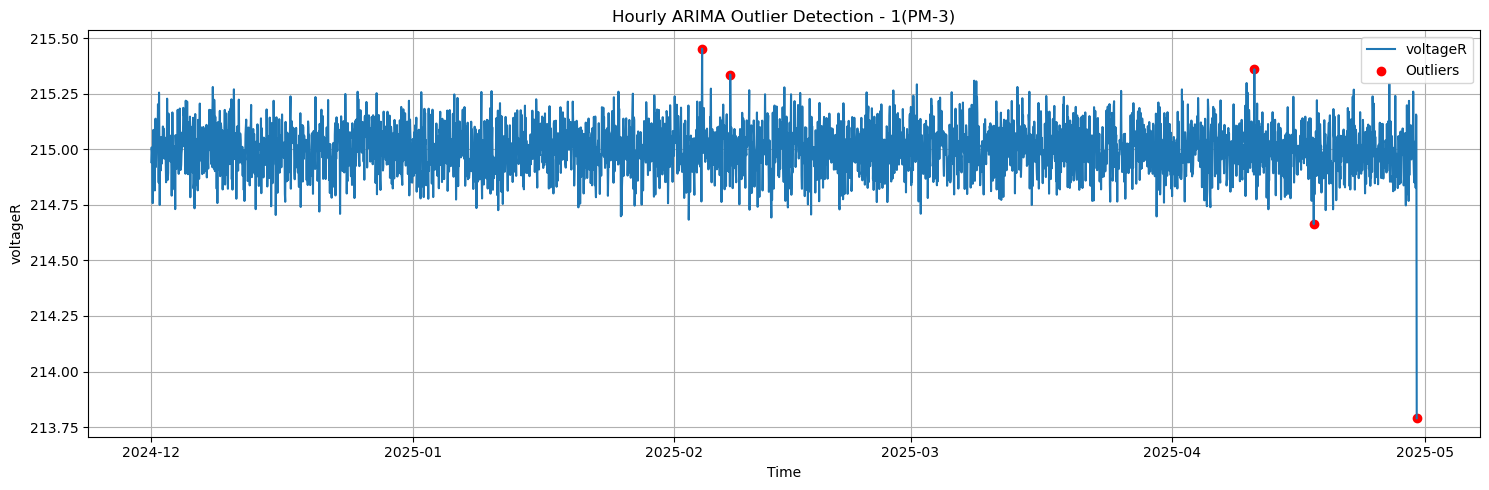

In [31]:
import matplotlib.pyplot as plt

def plot_arima_outliers(df, module_name, title_suffix='Hourly'):
    df_plot = df[df['module(equipment)'] == module_name]

    plt.figure(figsize=(15, 5))
    plt.plot(df_plot['localtime'], df_plot['voltageR'], label='voltageR')
    plt.scatter(df_plot['localtime'][df_plot['is_outlier']], df_plot['voltageR'][df_plot['is_outlier']],
                color='red', label='Outliers')
    plt.title(f"{title_suffix} ARIMA Outlier Detection - {module_name}")
    plt.xlabel("Time")
    plt.ylabel("voltageR")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 예시 시각화
plot_arima_outliers(outlier_hourly_arima, '1(PM-3)', 'Hourly')


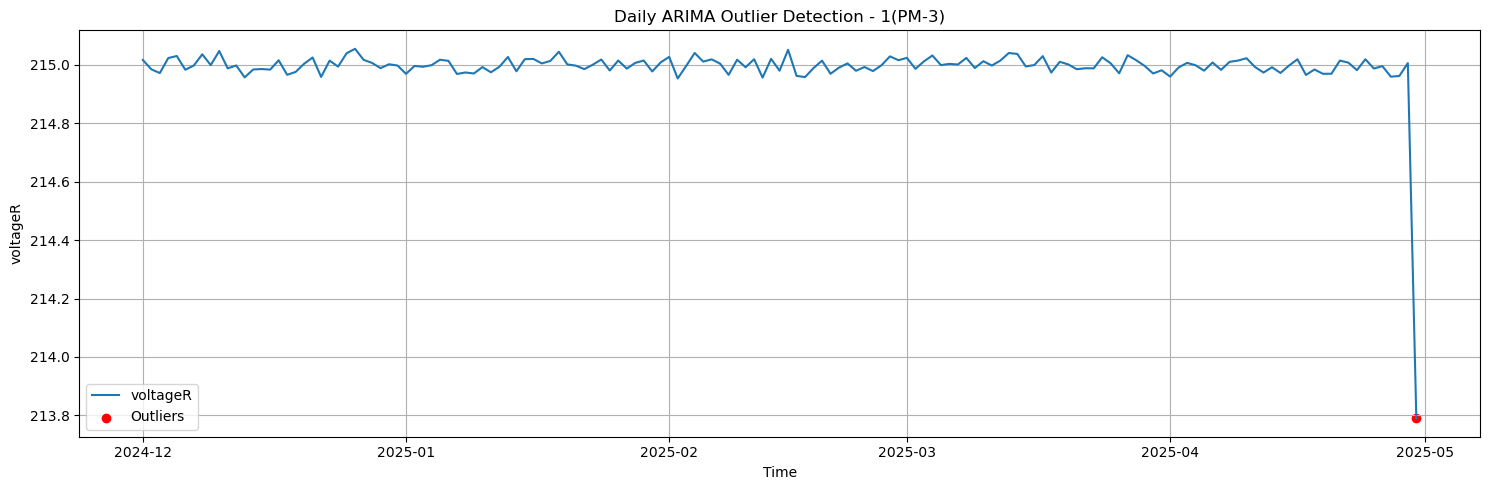

In [33]:
import matplotlib.pyplot as plt

def plot_arima_outliers(df, module_name, title_suffix='Daily'):
    df_plot = df[df['module(equipment)'] == module_name]

    plt.figure(figsize=(15, 5))
    plt.plot(df_plot['localtime'], df_plot['voltageR'], label='voltageR')
    plt.scatter(df_plot['localtime'][df_plot['is_outlier']], df_plot['voltageR'][df_plot['is_outlier']],
                color='red', label='Outliers')
    plt.title(f"{title_suffix} ARIMA Outlier Detection - {module_name}")
    plt.xlabel("Time")
    plt.ylabel("voltageR")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 예시 시각화
plot_arima_outliers(outlier_daily_arima, '1(PM-3)', 'Daily')


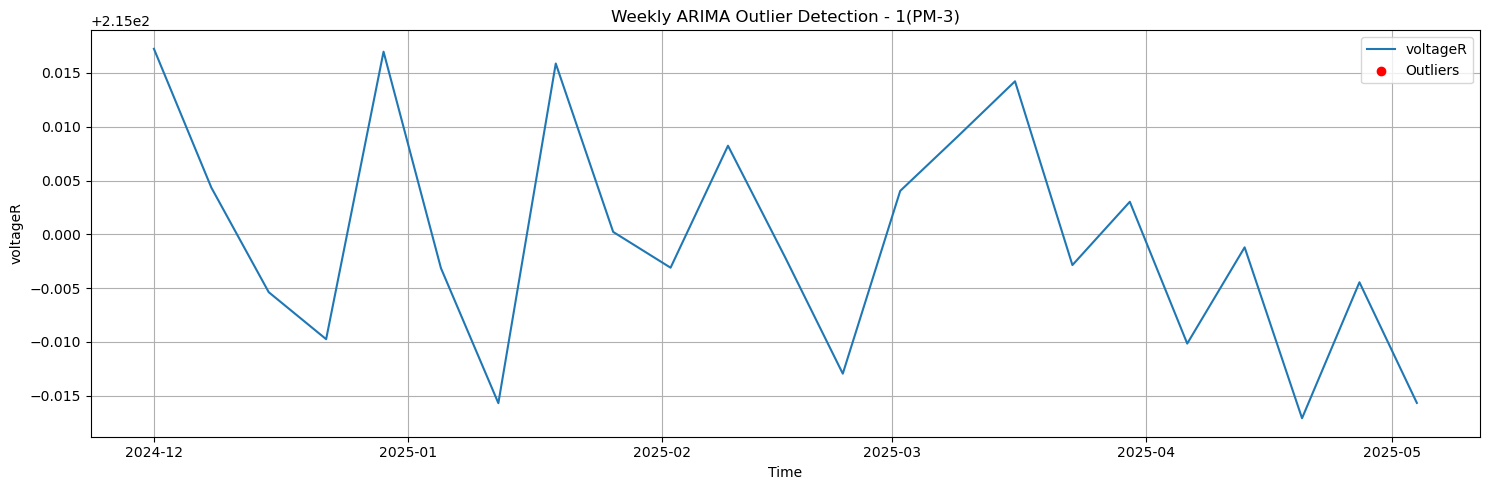

In [35]:
import matplotlib.pyplot as plt

def plot_arima_outliers(df, module_name, title_suffix='Weekly'):
    df_plot = df[df['module(equipment)'] == module_name]

    plt.figure(figsize=(15, 5))
    plt.plot(df_plot['localtime'], df_plot['voltageR'], label='voltageR')
    plt.scatter(df_plot['localtime'][df_plot['is_outlier']], df_plot['voltageR'][df_plot['is_outlier']],
                color='red', label='Outliers')
    plt.title(f"{title_suffix} ARIMA Outlier Detection - {module_name}")
    plt.xlabel("Time")
    plt.ylabel("voltageR")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 예시 시각화
plot_arima_outliers(outlier_weekly_arima, '1(PM-3)', 'Weekly')


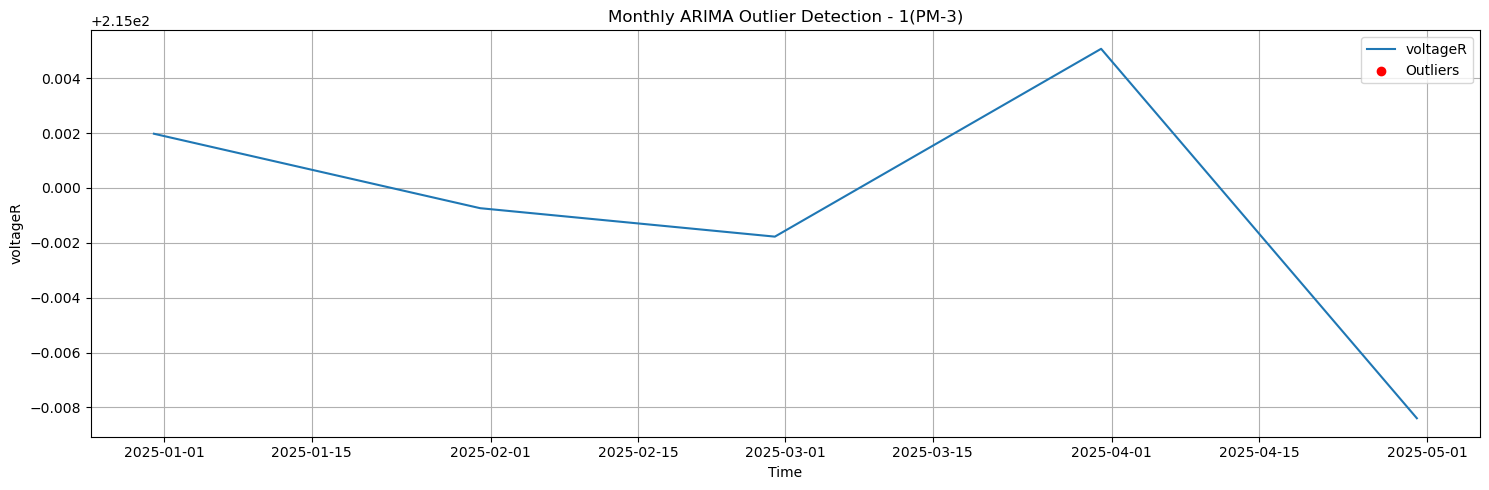

In [36]:
import matplotlib.pyplot as plt

def plot_arima_outliers(df, module_name, title_suffix='Monthly'):
    df_plot = df[df['module(equipment)'] == module_name]

    plt.figure(figsize=(15, 5))
    plt.plot(df_plot['localtime'], df_plot['voltageR'], label='voltageR')
    plt.scatter(df_plot['localtime'][df_plot['is_outlier']], df_plot['voltageR'][df_plot['is_outlier']],
                color='red', label='Outliers')
    plt.title(f"{title_suffix} ARIMA Outlier Detection - {module_name}")
    plt.xlabel("Time")
    plt.ylabel("voltageR")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 예시 시각화
plot_arima_outliers(outlier_monthly_arima, '1(PM-3)', 'Monthly')


/tmp/ipykernel_10785/1100566980.py:15: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10785/1100566980.py:15: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10785/1100566980.py:15: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10785/1100566980.py:15: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_10785/1100566980.py:15: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ec2-user/anaconda3/envs/python3/lib/python3.1

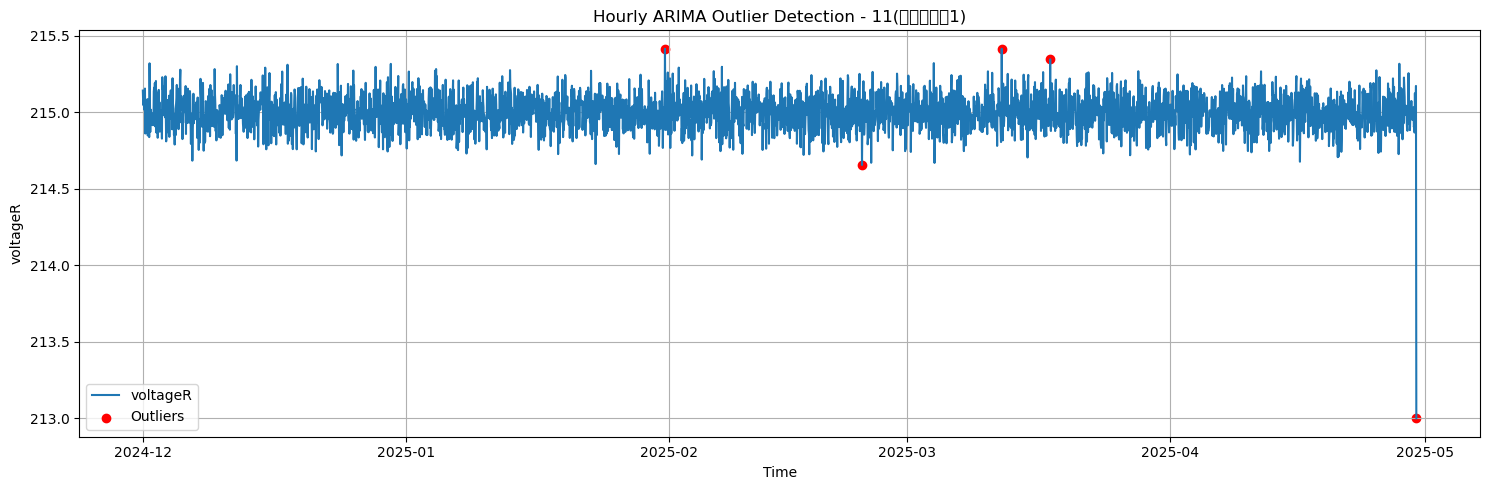

In [37]:
import matplotlib.pyplot as plt

def plot_arima_outliers(df, module_name, title_suffix='Hourly'):
    df_plot = df[df['module(equipment)'] == module_name]

    plt.figure(figsize=(15, 5))
    plt.plot(df_plot['localtime'], df_plot['voltageR'], label='voltageR')
    plt.scatter(df_plot['localtime'][df_plot['is_outlier']], df_plot['voltageR'][df_plot['is_outlier']],
                color='red', label='Outliers')
    plt.title(f"{title_suffix} ARIMA Outlier Detection - {module_name}")
    plt.xlabel("Time")
    plt.ylabel("voltageR")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 예시 시각화
plot_arima_outliers(outlier_hourly_arima, '11(우측분전반1)', 'Hourly')


In [38]:
df = pd.read_csv(train_path, usecols=['localtime', 'activePower','voltageR','timestamp','module(equipment)','accumActiveEnergy'])

In [39]:
module_voltage_mean = df.groupby('module(equipment)')['voltageR'].mean().reset_index()
module_voltage_mean.columns = ['module(equipment)', 'mean_voltageR']
print(module_voltage_mean)

   module(equipment)  mean_voltageR
0            1(PM-3)     214.999350
1         11(우측분전반1)     214.999552
2            12(4호기)     214.996172
3            13(3호기)     214.919787
4            14(2호기)     215.000863
5          15(예비건조기)     214.997790
6           16(호이스트)     215.001764
7            17(6호기)     215.001867
8         18(우측분전반2)     215.001442
9           2(L-1전등)     214.999489
10         3(분쇄기(2))     214.999816
11         4(분쇄기(1))     214.999865
12          5(좌측분전반)     215.001251


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예: 한 모듈의 이상치 시각화
mod = '1(PM-3)'
df_plot = outlier_hourly[outlier_hourly['module(equipment)'] == mod]

plt.figure(figsize=(16, 5))
sns.lineplot(data=df_plot, x='timestamp', y='voltageR', label='VoltageR')
sns.scatterplot(data=df_plot[df_plot['is_outlier']], x='timestamp', y='voltageR', color='red', label='Outlier')
plt.title(f"Hourly Voltage with Outliers - {mod}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예: 한 모듈의 이상치 시각화
mod = '11(우측분전반1)'
df_plot = outlier_hourly[outlier_hourly['module(equipment)'] == mod]

plt.figure(figsize=(16, 5))
sns.lineplot(data=df_plot, x='timestamp', y='voltageR', label='VoltageR')
sns.scatterplot(data=df_plot[df_plot['is_outlier']], x='timestamp', y='voltageR', color='red', label='Outlier')
plt.title(f"Hourly Voltage with Outliers - {mod}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예: 한 모듈의 이상치 시각화
mod = '12(4호기)'
df_plot = outlier_hourly[outlier_hourly['module(equipment)'] == mod]

plt.figure(figsize=(16, 5))
sns.lineplot(data=df_plot, x='timestamp', y='voltageR', label='VoltageR')
sns.scatterplot(data=df_plot[df_plot['is_outlier']], x='timestamp', y='voltageR', color='red', label='Outlier')
plt.title(f"Hourly Voltage with Outliers - {mod}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예: 한 모듈의 이상치 시각화
mod = '13(3호기)'
df_plot = outlier_hourly[outlier_hourly['module(equipment)'] == mod]

plt.figure(figsize=(16, 5))
sns.lineplot(data=df_plot, x='timestamp', y='voltageR', label='VoltageR')
sns.scatterplot(data=df_plot[df_plot['is_outlier']], x='timestamp', y='voltageR', color='red', label='Outlier')
plt.title(f"Hourly Voltage with Outliers - {mod}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예: 한 모듈의 이상치 시각화
mod = '14(2호기)'
df_plot = outlier_hourly[outlier_hourly['module(equipment)'] == mod]

plt.figure(figsize=(16, 5))
sns.lineplot(data=df_plot, x='timestamp', y='voltageR', label='VoltageR')
sns.scatterplot(data=df_plot[df_plot['is_outlier']], x='timestamp', y='voltageR', color='red', label='Outlier')
plt.title(f"Hourly Voltage with Outliers - {mod}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예: 한 모듈의 이상치 시각화
mod = '15(예비건조기)'
df_plot = outlier_hourly[outlier_hourly['module(equipment)'] == mod]

plt.figure(figsize=(16, 5))
sns.lineplot(data=df_plot, x='timestamp', y='voltageR', label='VoltageR')
sns.scatterplot(data=df_plot[df_plot['is_outlier']], x='timestamp', y='voltageR', color='red', label='Outlier')
plt.title(f"Hourly Voltage with Outliers - {mod}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예: 한 모듈의 이상치 시각화
mod = '16(호이스트)'
df_plot = outlier_hourly[outlier_hourly['module(equipment)'] == mod]

plt.figure(figsize=(16, 5))
sns.lineplot(data=df_plot, x='timestamp', y='voltageR', label='VoltageR')
sns.scatterplot(data=df_plot[df_plot['is_outlier']], x='timestamp', y='voltageR', color='red', label='Outlier')
plt.title(f"Hourly Voltage with Outliers - {mod}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예: 한 모듈의 이상치 시각화
mod = '17(6호기)'
df_plot = outlier_hourly[outlier_hourly['module(equipment)'] == mod]

plt.figure(figsize=(16, 5))
sns.lineplot(data=df_plot, x='timestamp', y='voltageR', label='VoltageR')
sns.scatterplot(data=df_plot[df_plot['is_outlier']], x='timestamp', y='voltageR', color='red', label='Outlier')
plt.title(f"Hourly Voltage with Outliers - {mod}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예: 한 모듈의 이상치 시각화
mod = '18(우측분전반2)'
df_plot = outlier_hourly[outlier_hourly['module(equipment)'] == mod]

plt.figure(figsize=(16, 5))
sns.lineplot(data=df_plot, x='timestamp', y='voltageR', label='VoltageR')
sns.scatterplot(data=df_plot[df_plot['is_outlier']], x='timestamp', y='voltageR', color='red', label='Outlier')
plt.title(f"Hourly Voltage with Outliers - {mod}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예: 한 모듈의 이상치 시각화
mod = '2(L-1전등)'
df_plot = outlier_hourly[outlier_hourly['module(equipment)'] == mod]

plt.figure(figsize=(16, 5))
sns.lineplot(data=df_plot, x='timestamp', y='voltageR', label='VoltageR')
sns.scatterplot(data=df_plot[df_plot['is_outlier']], x='timestamp', y='voltageR', color='red', label='Outlier')
plt.title(f"Hourly Voltage with Outliers - {mod}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예: 한 모듈의 이상치 시각화
mod = '3(분쇄기(2))'
df_plot = outlier_hourly[outlier_hourly['module(equipment)'] == mod]

plt.figure(figsize=(16, 5))
sns.lineplot(data=df_plot, x='timestamp', y='voltageR', label='VoltageR')
sns.scatterplot(data=df_plot[df_plot['is_outlier']], x='timestamp', y='voltageR', color='red', label='Outlier')
plt.title(f"Hourly Voltage with Outliers - {mod}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예: 한 모듈의 이상치 시각화
mod = '4(분쇄기(1)))'
df_plot = outlier_hourly[outlier_hourly['module(equipment)'] == mod]

plt.figure(figsize=(16, 5))
sns.lineplot(data=df_plot, x='timestamp', y='voltageR', label='VoltageR')
sns.scatterplot(data=df_plot[df_plot['is_outlier']], x='timestamp', y='voltageR', color='red', label='Outlier')
plt.title(f"Hourly Voltage with Outliers - {mod}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예: 한 모듈의 이상치 시각화
mod = '5(좌측분전반)'
df_plot = outlier_hourly[outlier_hourly['module(equipment)'] == mod]

plt.figure(figsize=(16, 5))
sns.lineplot(data=df_plot, x='timestamp', y='voltageR', label='VoltageR')
sns.scatterplot(data=df_plot[df_plot['is_outlier']], x='timestamp', y='voltageR', color='red', label='Outlier')
plt.title(f"Hourly Voltage with Outliers - {mod}")
plt.grid(True)
plt.tight_layout()
plt.show()